# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The different datattypes include integer, float and objects respectively.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no null values in the data set.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
It shows that a minimum of 20 minutes, an average of 27 minutes and a maximum of 35 minutes to prepare the food.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Write the code here
not_rated = df[df.rating=='Not given']
len(not_rated)

736

#### Observations:
736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

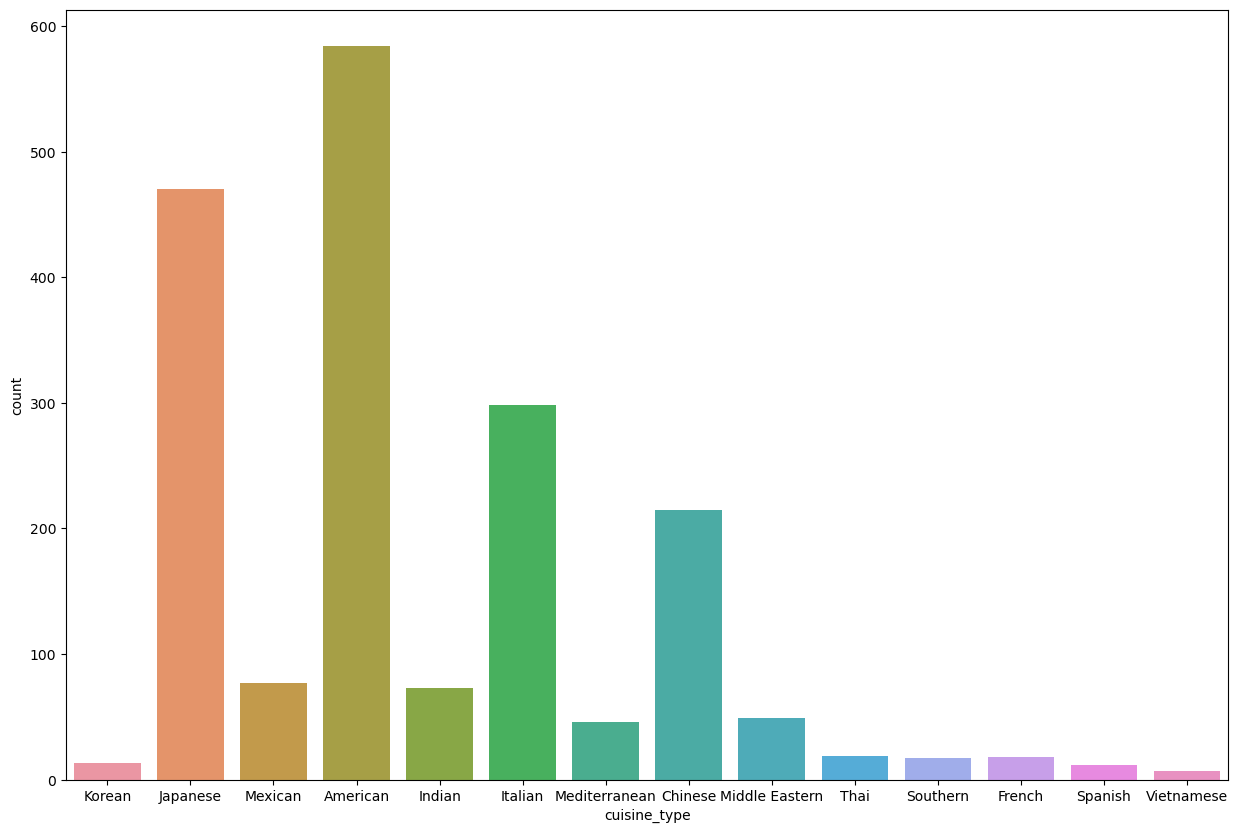

In [8]:
# Write the code here
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='cuisine_type');

The most popular cuisines are American, Japanese,Italian,Chinese. Mexican and Indian cuisines are the second popular ones.

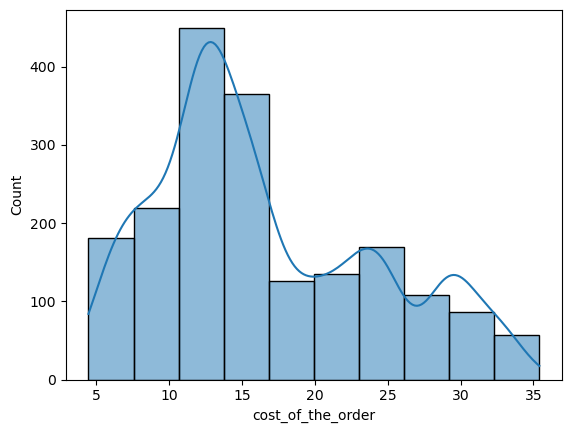

In [9]:
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()

The histplot is right-skewed which means it towards lower costs. But the count of 25 is somehow relatively high compared to the others.

In [10]:
# Since the data type of "rating" is originally object, we need to change it to float for further analysis.
# First we need to replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)

# Then Change the data types accordingly

df = df.astype({"rating": float})

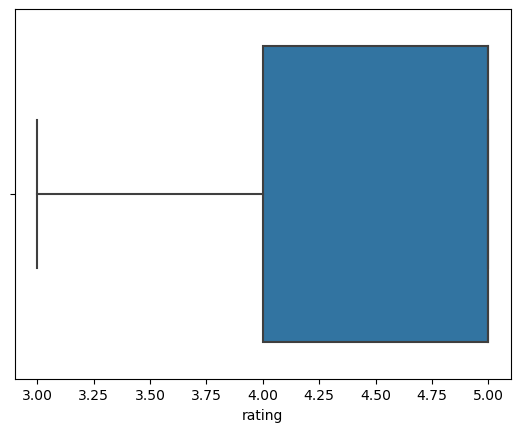

In [11]:
df2 = df[df['rating']!= 0]

sns.boxplot(data = df2, x='rating')
plt.show();

After excluding ratings that were not rated, we could see that most of the ratings are high and they are particularly concentrated from 4 to 5.

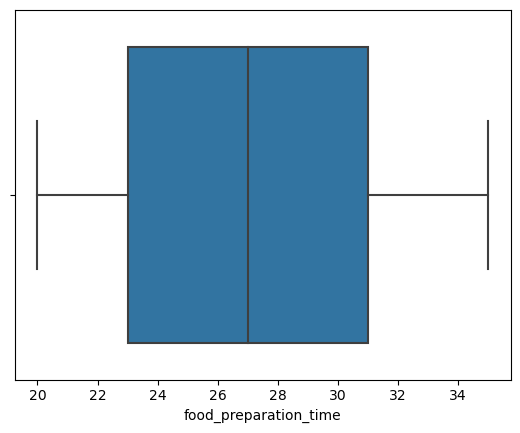

In [12]:
sns.boxplot(data=df, x='food_preparation_time');

The shape of the boxplot is proper and regular. The food preparation time is evenly distributed between 20 minutes and 35 minutes with a median of about 27 minutes.

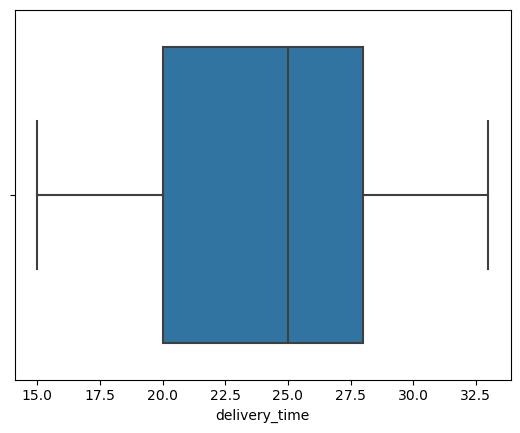

In [13]:
sns.boxplot(data=df, x='delivery_time');

The boxplot is slighly left-skewed with 25 minutes as the median delivery time.

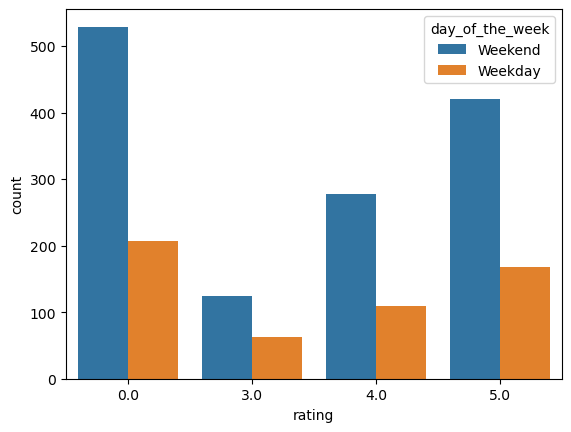

In [14]:
sns.countplot(data=df, x='rating', hue='day_of_the_week');

Obviously the numbers of ratings on weekends are much bigger than that of weekdays, including both Not given and numerical values.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Write the code here
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken as well as Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Write the code here
df3=df[df.day_of_the_week=='Weekend']
df3.cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American Cuisine Type is the most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [17]:
# Write the code here
df.loc[df['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,0.0,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3.0,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4.0,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,0.0,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17


In [18]:
print(555/1898)

0.2924130663856691


#### Observations:
29.24% of Total orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Write the code here
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
The top 3 most frequent customers whose IDs are 52832, 47440 as well as 83287 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [21]:
# Write the code here
# The data types of "order_id" and "customer_id" need to be changed first for further analysis.
df = df.astype({"rating": float, "order_id": object, "customer_id": object})

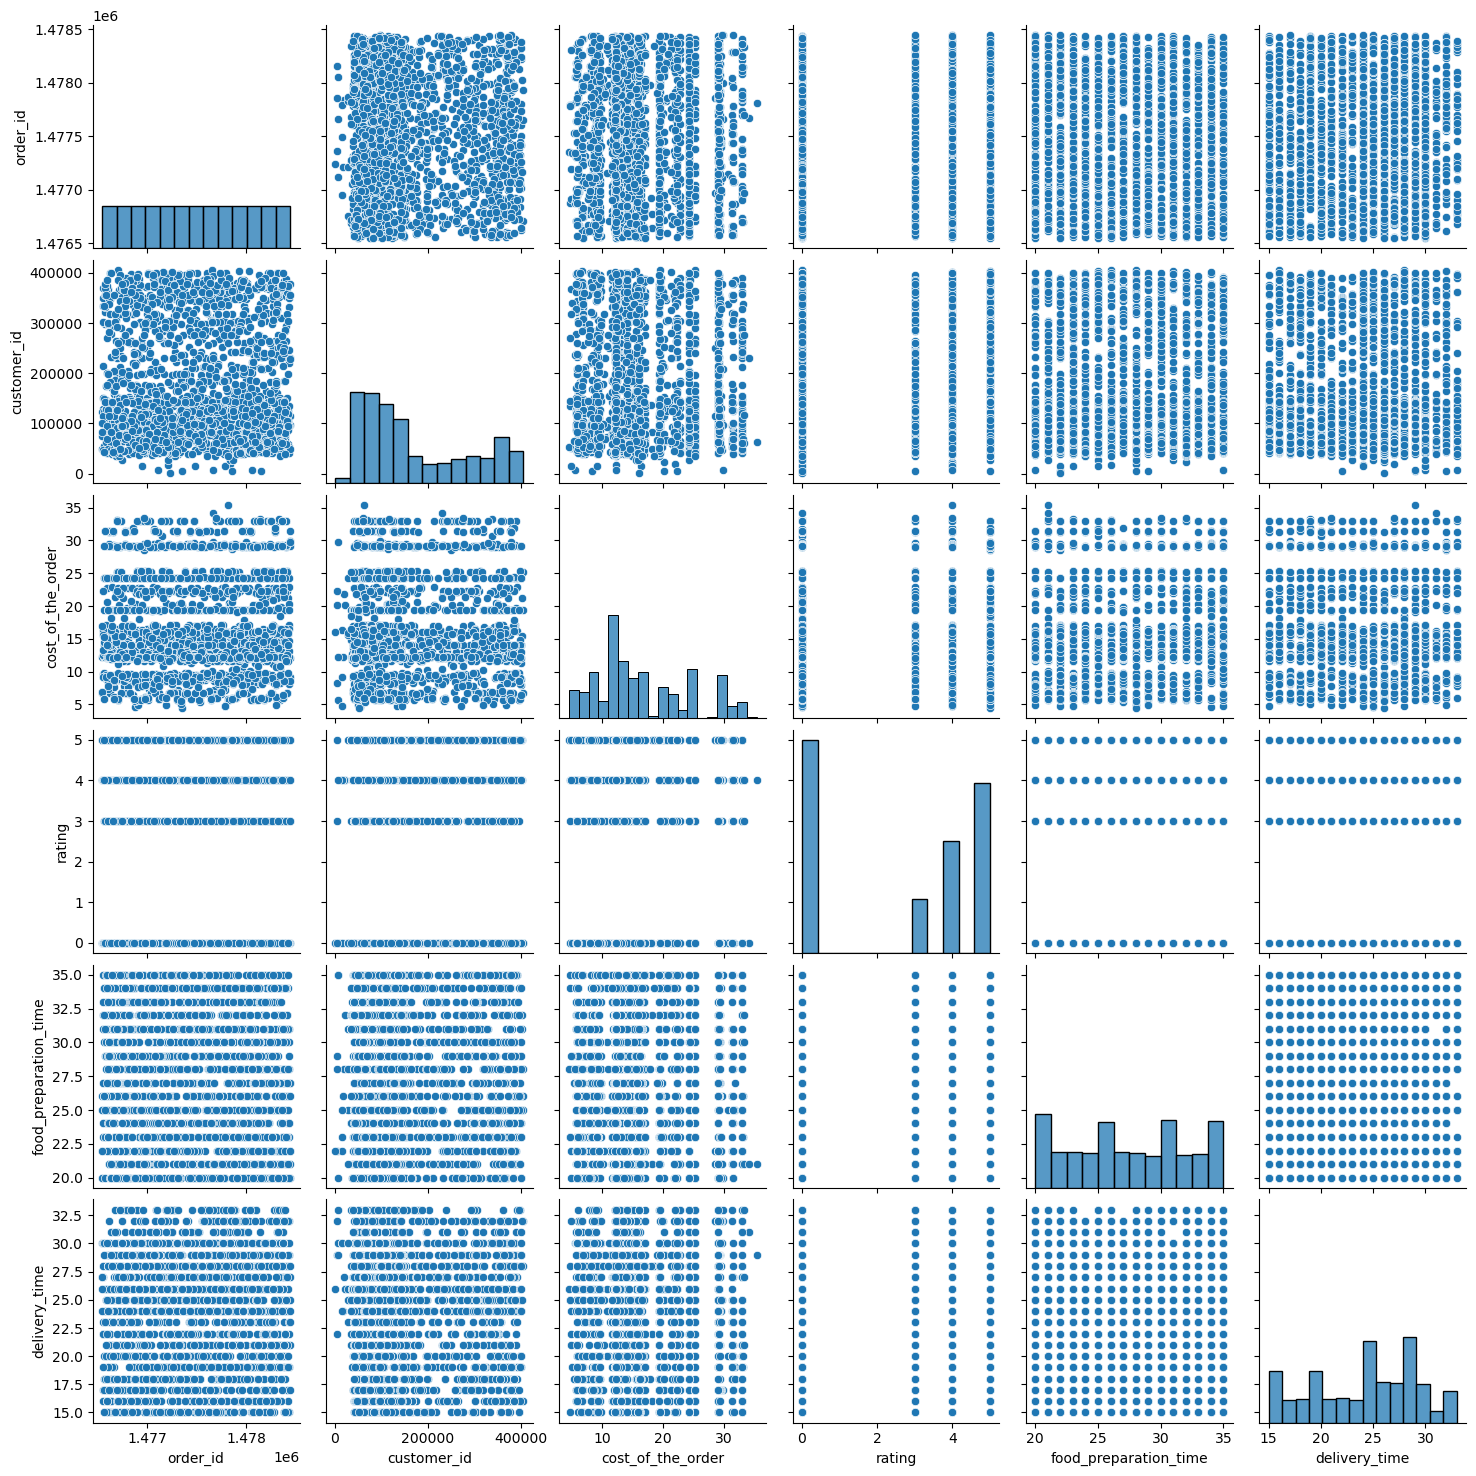

In [22]:
sns.pairplot(data=df)
plt.show()

C:\Users\Tin Chung\AppData\Local\Temp\ipykernel_11772\2769866956.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


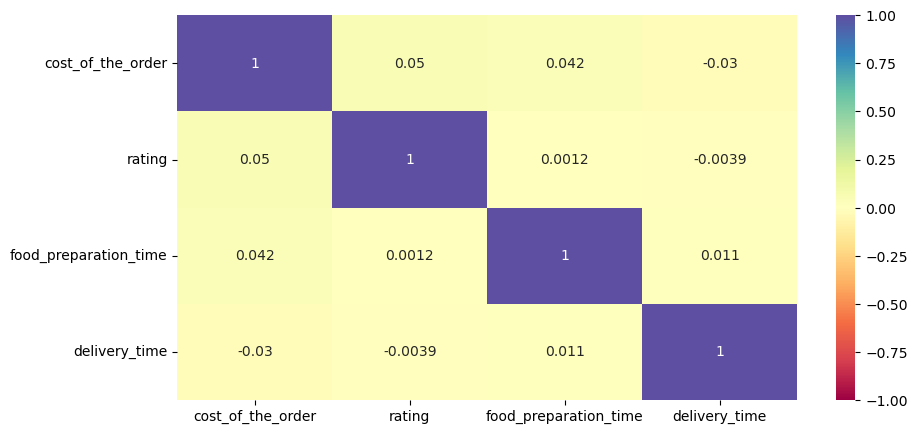

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

No significant correlations between the variables can be identified based on the pairplot and heatmap above.

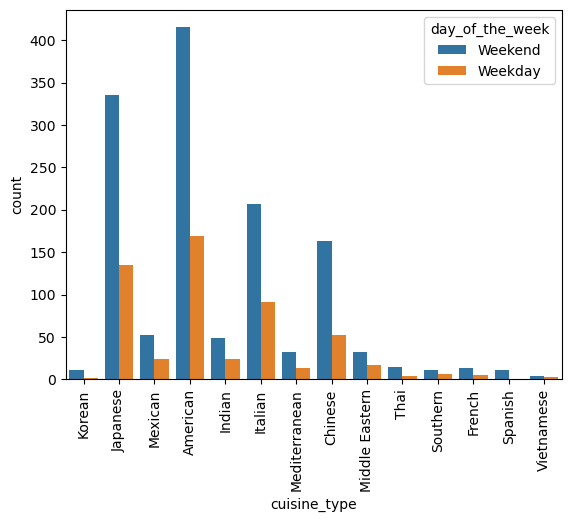

In [24]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Basically it is as if the countplot done in the Univariate Analysis. It also shows that the orders are obviously much higher on weekends.

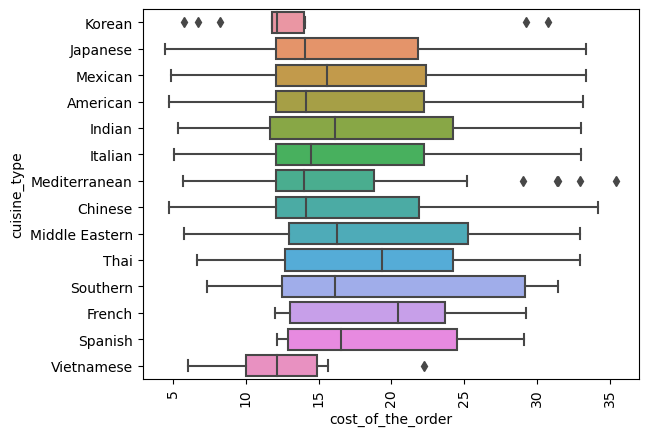

In [25]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

Korean, Mediterranean and Vietnamese cuisine have outliers as shown above. Different cuisines vary in the boxplot, but we can see that the median cost of the orders is about 15.

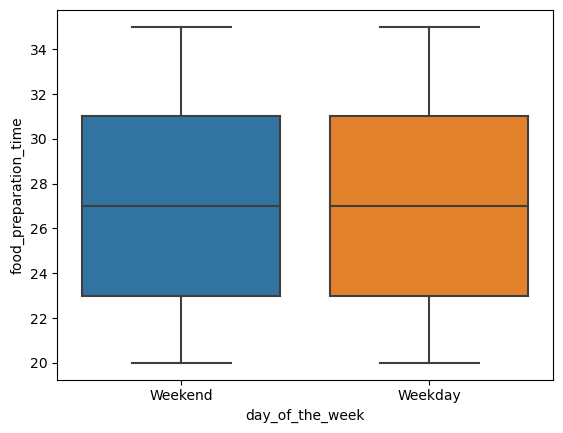

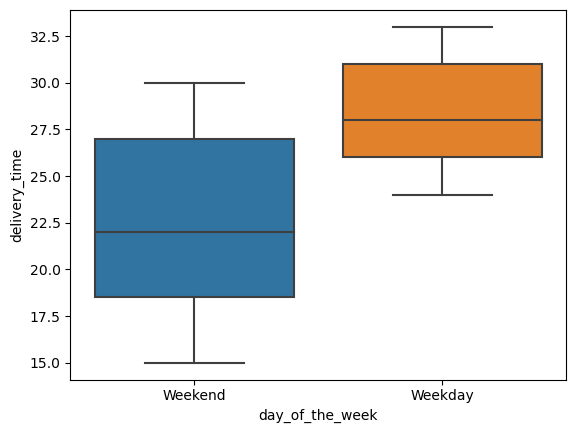

In [26]:
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

The food preparation time on weekdays and weekends is basically the same, while the delivery time on weekdays is longer than that on weekends. The median delivery time for weekends and weekdays are about 22.5 minutes and 28.5 minutes respectively.

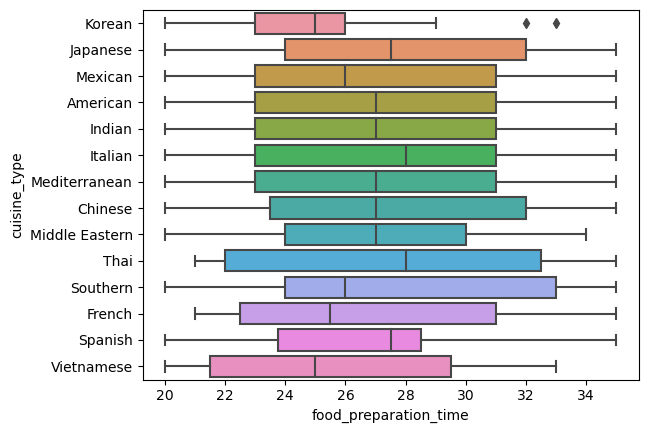

In [27]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()

Korean cuisine is the only one having outliers in the boxplot. Generally it takes about 25 to 27 minutes to prepare different cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
# Write the code here
df4 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  
df4.reset_index(inplace=True)

df5 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
df5.reset_index(inplace=True)

qualified_restaurants = pd.merge(df5[df5['rating']== True], df4[df4['rating']== True],on ='restaurant_name')
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop can fulfill the criteria to get the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
# Write the code here
df6 = df[df.cost_of_the_order>20]
amount1 = df6.cost_of_the_order.sum()*.25

df7=df[df.cost_of_the_order<=20]
amount2=df7[df7.cost_of_the_order>5].cost_of_the_order.sum()*.15

net_revenue = amount1 + amount2
print(round(net_revenue,2))

6166.3


#### Observations:
The net revenue generated is $6166.3.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
# Write the code here
df['total'] = df['food_preparation_time'] + df['delivery_time']
(df['total']>60).sum()

200

In [31]:
df['total']

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: total, Length: 1898, dtype: int64

In [32]:
print(200 / 1897)

0.10542962572482868


#### Observations:
About 10.54% of orders take more than 60 minutes to prepare and deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1.There are in fact many rating with "Not given" as the result. Therefore we cannot say we really know how our customers think and feel.

2.American, Japanese,Italian and Chinese cuisine are the most popular ones, and they need to be maintained and even strengthened for substantial business. Meanwhile other kinds of cuisine should also be promoted to increase the profits.

3.It can be deduced that because of the high demands, the delivery time on weekdays is much longer than that on weekends.

### Recommendations:

1.It is a common phenomenon that cusomters generally do not bother to give any comments. If we want to know how they really think, perhaps some incentives are needed to encourage them to leave a rating.

2.Some more advertisements and promotions may be required for Western European, South-eastern and Korean cuisine as we can see that not many customers of ours have ordered these food.

3.Regarding the longer delivery time onWe should find ways to reduce the delivery time to satisfy our customers' needs.

4.On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them, considering the financial implication, or factor other aspects to distinguish the customers such as the amount spent by each one of the customers in a tie.

---